# Using GridSearchCV
In this notebook I will show you how to GridSearchCV to comapre results from different values of k in KNeighboursClassifier.
Scikit-learn provides an object(GridSearchCV) that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Loading the dataset
We'll be distributing the dataset into label and feature vectors.

In [3]:
data = load_iris()

X = data.data                                   #Feature vector
y = data.target                                 #Label vector

## Generic way of testing different k values

'k' is used for deciding the neighbours the model can take for making clusters in KNeighbourClassifier.
To test different values we can repeateadliy create a Classifier and store the results in a list.

In [4]:
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

print (k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


## Plotting the result

Text(0, 0.5, 'Mean score of k value')

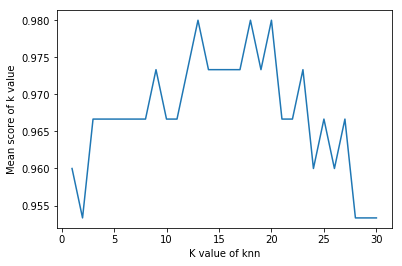

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('K value of knn')
plt.ylabel('Mean score of k value')

#### Breaking down the graphs
As we can see from the graph, the maximum value of accuracy reached is 98% and by k values of 13,18 and 20

This process of finding the mean and all will be repeated many times thus it is inefficient. Now we will introduce a new function GridSearchCV which will help us in selectng the best tuning parameters.

## Working with GridSearchCV from sklearn.model_selection

In [8]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
param_grid = dict(n_neighbors = k_range)             #making dictionary of paramerts we want to change

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', return_train_score = False)

grid.fit(X,y)                                        #Using the vectors for fitting the object

grid.cv_results_['mean_test_score']

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

In [9]:
pan = pd.DataFrame(grid.cv_results_)

pan.mean_test_score                             #all the mean test scores

0     0.960000
1     0.953333
2     0.966667
3     0.966667
4     0.966667
5     0.966667
6     0.966667
7     0.966667
8     0.973333
9     0.966667
10    0.966667
11    0.973333
12    0.980000
13    0.973333
14    0.973333
15    0.973333
16    0.973333
17    0.980000
18    0.973333
19    0.980000
20    0.966667
21    0.966667
22    0.973333
23    0.960000
24    0.966667
25    0.960000
26    0.966667
27    0.953333
28    0.953333
29    0.953333
Name: mean_test_score, dtype: float64

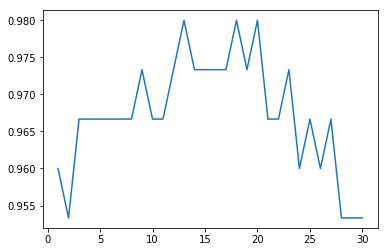

In [10]:
grid_mean_score = [result for result in grid.cv_results_['mean_test_score']]

plt.plot(k_range, grid_mean_score)                    # Graph between diffrent values of 'k' and mean test scores

### We observe the same as we did earlier 

In [11]:
print(grid.best_params_)                                  #printing the best combination of parameters based on accuracy
print(grid.best_score_)                                   #printing the best score
print(grid.best_estimator_)                               #printing the estimator with all the constructor values

{'n_neighbors': 13}
0.98
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')
